# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Importing the data

In [2]:
file_path = "./data/features_30_sec.csv"

In [3]:
df = pd.read_csv(file_path)

In [4]:
df.describe()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,662030.846000,0.378682,0.086340,0.130930,0.003051,2201.780898,4.696916e+05,2242.541070,137079.155165,4571.549304,...,1.148144,60.730958,-3.966028,62.633624,0.507696,63.712586,-2.328761,66.231930,-1.095348,70.126096
std,1784.073992,0.081705,0.007735,0.065683,0.003634,715.960600,4.008995e+05,526.316473,96455.666326,1574.791602,...,4.578948,33.781951,4.549697,33.479172,3.869105,34.401977,3.755957,37.174631,3.837007,45.228512
min,660000.000000,0.171939,0.044555,0.005276,0.000004,570.040355,7.911251e+03,898.066208,10787.185064,749.140636,...,-15.693844,9.169314,-17.234728,13.931521,-11.963694,15.420555,-18.501955,13.487622,-19.929634,7.956583
25%,661504.000000,0.319562,0.082298,0.086657,0.000942,1627.697311,1.843505e+05,1907.240605,67376.554428,3380.069642,...,-1.863280,40.376442,-7.207225,40.830875,-2.007015,41.884240,-4.662925,41.710184,-3.368996,42.372865
50%,661794.000000,0.383148,0.086615,0.122443,0.001816,2209.263090,3.384862e+05,2221.392843,111977.548036,4658.524473,...,1.212809,52.325077,-4.065605,54.717674,0.669643,54.804890,-2.393862,57.423059,-1.166289,59.186117
75%,661794.000000,0.435942,0.091256,0.175682,0.003577,2691.294667,6.121479e+05,2578.469836,182371.576801,5533.810460,...,4.359662,71.691755,-0.838737,75.040838,3.119212,75.385832,0.150573,78.626444,1.312615,85.375374
max,675808.000000,0.663685,0.108111,0.397973,0.027679,4435.243901,3.036843e+06,3509.646417,694784.811549,8677.672688,...,13.457150,392.932373,11.482946,406.058868,15.388390,332.905426,14.694924,393.161987,15.369627,506.065155


First of all, we check for null values:

<AxesSubplot: >

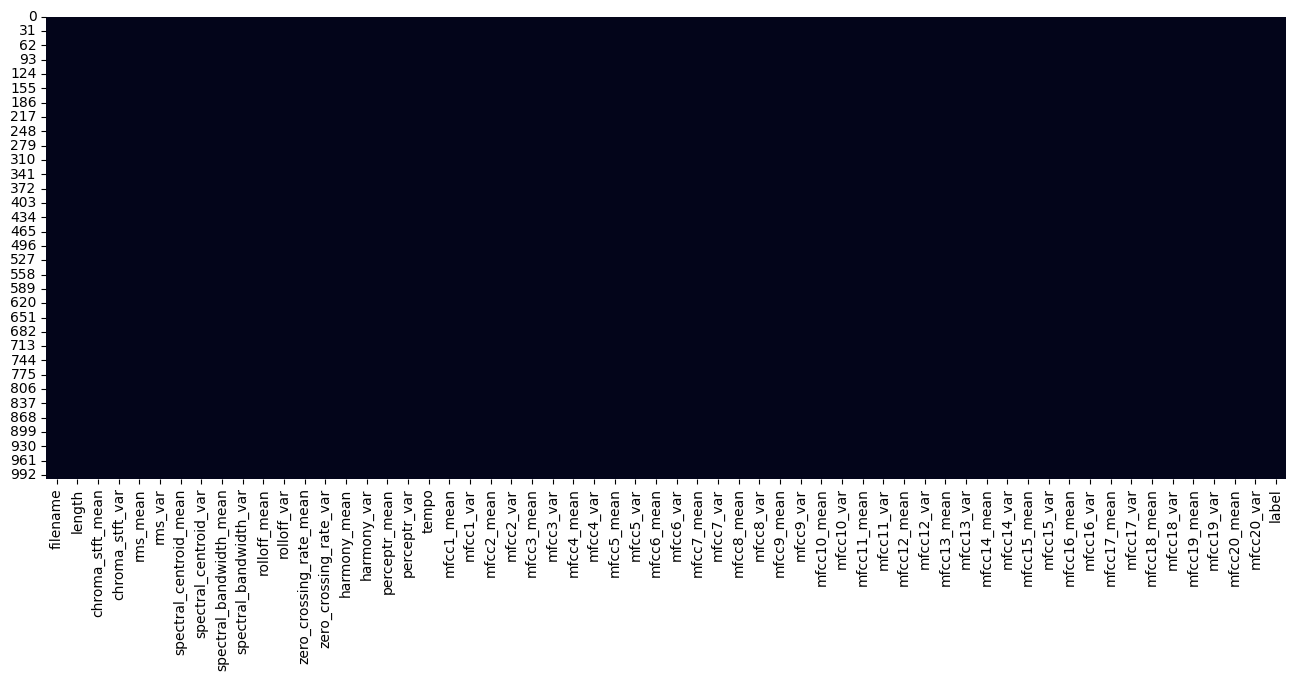

In [5]:
fig, ax = plt.subplots(figsize=(16,6))
sns.heatmap(df.isna(), cbar=False, ax=ax)

There are no missing values. We proceed by checking if all filenames are unique:

In [6]:
df["filename"].nunique()

1000

## Setting the correct datatypes

Now we can set the correct datatypes so that we will use less memory and speed up some computations:

We select the numeric features only and plot the min or the max value according to which one is the biggest:

In [7]:
df_num = df.select_dtypes(include="number")

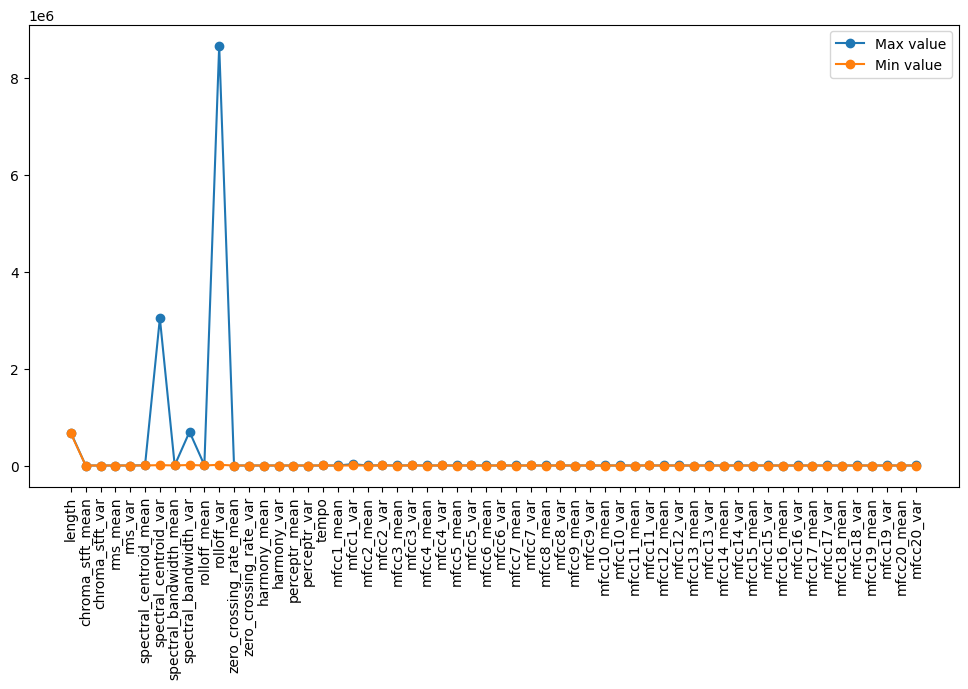

In [8]:
fig, axs = plt.subplots(figsize=(12,6))
plt.plot(df_num.columns, df_num.max(), "-o", label="Max value")
plt.plot(df_num.columns, df_num.min(), "-o", label="Min value")
plt.xticks(rotation=90)
plt.legend()

We can see that only 4 features present a large value: `length`, `spectral_centroid_var`, `spectral_bandwidth_var` and `rolloff_var`.

We change the datatypes in order to waste less space possible.

In [9]:
df_num.max()

length                     6.758080e+05
chroma_stft_mean           6.636847e-01
chroma_stft_var            1.081115e-01
rms_mean                   3.979734e-01
rms_var                    2.767948e-02
spectral_centroid_mean     4.435244e+03
spectral_centroid_var      3.036843e+06
spectral_bandwidth_mean    3.509646e+03
spectral_bandwidth_var     6.947848e+05
rolloff_mean               8.677673e+03
rolloff_var                8.660900e+06
zero_crossing_rate_mean    2.746308e-01
zero_crossing_rate_var     2.871840e-02
harmony_mean               1.505448e-02
harmony_var                8.565789e-02
perceptr_mean              5.786965e-03
perceptr_var               4.744598e-02
tempo                      2.349077e+02
mfcc1_mean                 4.203943e+01
mfcc1_var                  2.824344e+04
mfcc2_mean                 1.930974e+02
mfcc2_var                  4.025973e+03
mfcc3_mean                 5.668280e+01
mfcc3_var                  2.924435e+03
mfcc4_mean                 8.070230e+01


In [10]:
print(f"{df.memory_usage(deep=True).sum() / 1024 / 1024:.3f} MB")

0.571 MB


In [11]:
np.iinfo(np.int32), np.finfo(np.float16), np.finfo(np.float32)

(iinfo(min=-2147483648, max=2147483647, dtype=int32),
 finfo(resolution=0.001, min=-6.55040e+04, max=6.55040e+04, dtype=float16),
 finfo(resolution=1e-06, min=-3.4028235e+38, max=3.4028235e+38, dtype=float32))

We can safely use the `float32` datatype in place of `float64`. 

We perform the conversion:

In [12]:
dtypes = {col:np.float32 for col in df.columns}
dtypes["filename"] = "string"
dtypes["length"] = np.int32
dtypes["label"] = "category"

In [13]:
df_new = df.astype(dtypes)

In [14]:
print(f"{df_new.memory_usage(deep=True).sum() / 1024 / 1024:.3f} MB")

0.292 MB


In [15]:
df_new.describe()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,662030.846000,0.378682,0.086340,0.130930,0.003051,2201.781006,4.696916e+05,2242.541016,137079.156250,4571.549316,...,1.148144,60.730961,-3.966028,62.633625,0.507696,63.712585,-2.328761,66.231926,-1.095348,70.126091
std,1784.073992,0.081705,0.007735,0.065683,0.003634,715.960632,4.008995e+05,526.316467,96455.664062,1574.791626,...,4.578948,33.781952,4.549697,33.479172,3.869105,34.401978,3.755956,37.174633,3.837007,45.228512
min,660000.000000,0.171939,0.044555,0.005276,0.000004,570.040344,7.911251e+03,898.066223,10787.185547,749.140625,...,-15.693844,9.169314,-17.234728,13.931521,-11.963694,15.420555,-18.501955,13.487622,-19.929634,7.956583
25%,661504.000000,0.319562,0.082298,0.086657,0.000942,1627.697327,1.843505e+05,1907.240631,67376.554688,3380.069702,...,-1.863280,40.376442,-7.207225,40.830875,-2.007015,41.884240,-4.662925,41.710184,-3.368996,42.372865
50%,661794.000000,0.383148,0.086615,0.122443,0.001816,2209.263062,3.384862e+05,2221.392822,111977.546875,4658.524414,...,1.212809,52.325077,-4.065605,54.717674,0.669643,54.804890,-2.393862,57.423059,-1.166289,59.186117
75%,661794.000000,0.435942,0.091256,0.175682,0.003577,2691.294739,6.121479e+05,2578.469849,182371.570312,5533.810547,...,4.359662,71.691755,-0.838737,75.040838,3.119212,75.385832,0.150573,78.626444,1.312615,85.375374
max,675808.000000,0.663685,0.108111,0.397973,0.027679,4435.244141,3.036843e+06,3509.646484,694784.812500,8677.672852,...,13.457150,392.932373,11.482946,406.058868,15.388390,332.905426,14.694924,393.161987,15.369627,506.065155


We were able to reduce the size in memory of the dataset by a factor of almost 2.

## Exploring the target

In [16]:
df = df_new

Now we investigate the target variable, which is `label`. It is a categorical variable therefore we will use a histogram:

<AxesSubplot: xlabel='label', ylabel='Count'>

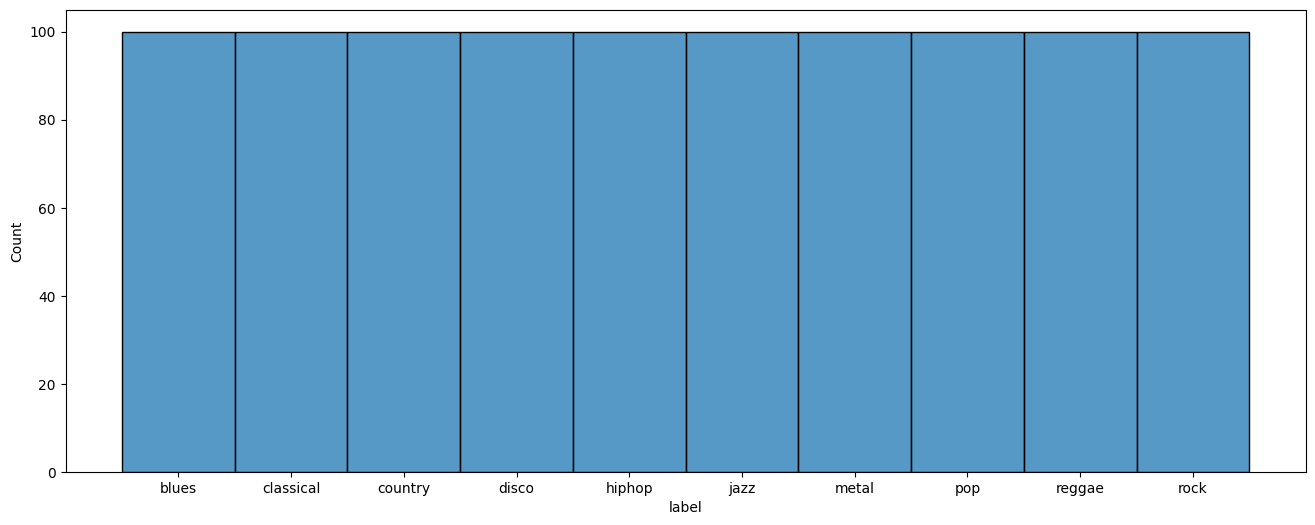

In [17]:
fig, ax = plt.subplots(figsize=(16,6))
sns.histplot(df, x="label", ax=ax)

# Feature selection

C:\Users\Alby\AppData\Local\Temp\ipykernel_13564\809721413.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="YlGnBu", ax=ax)


<AxesSubplot: >

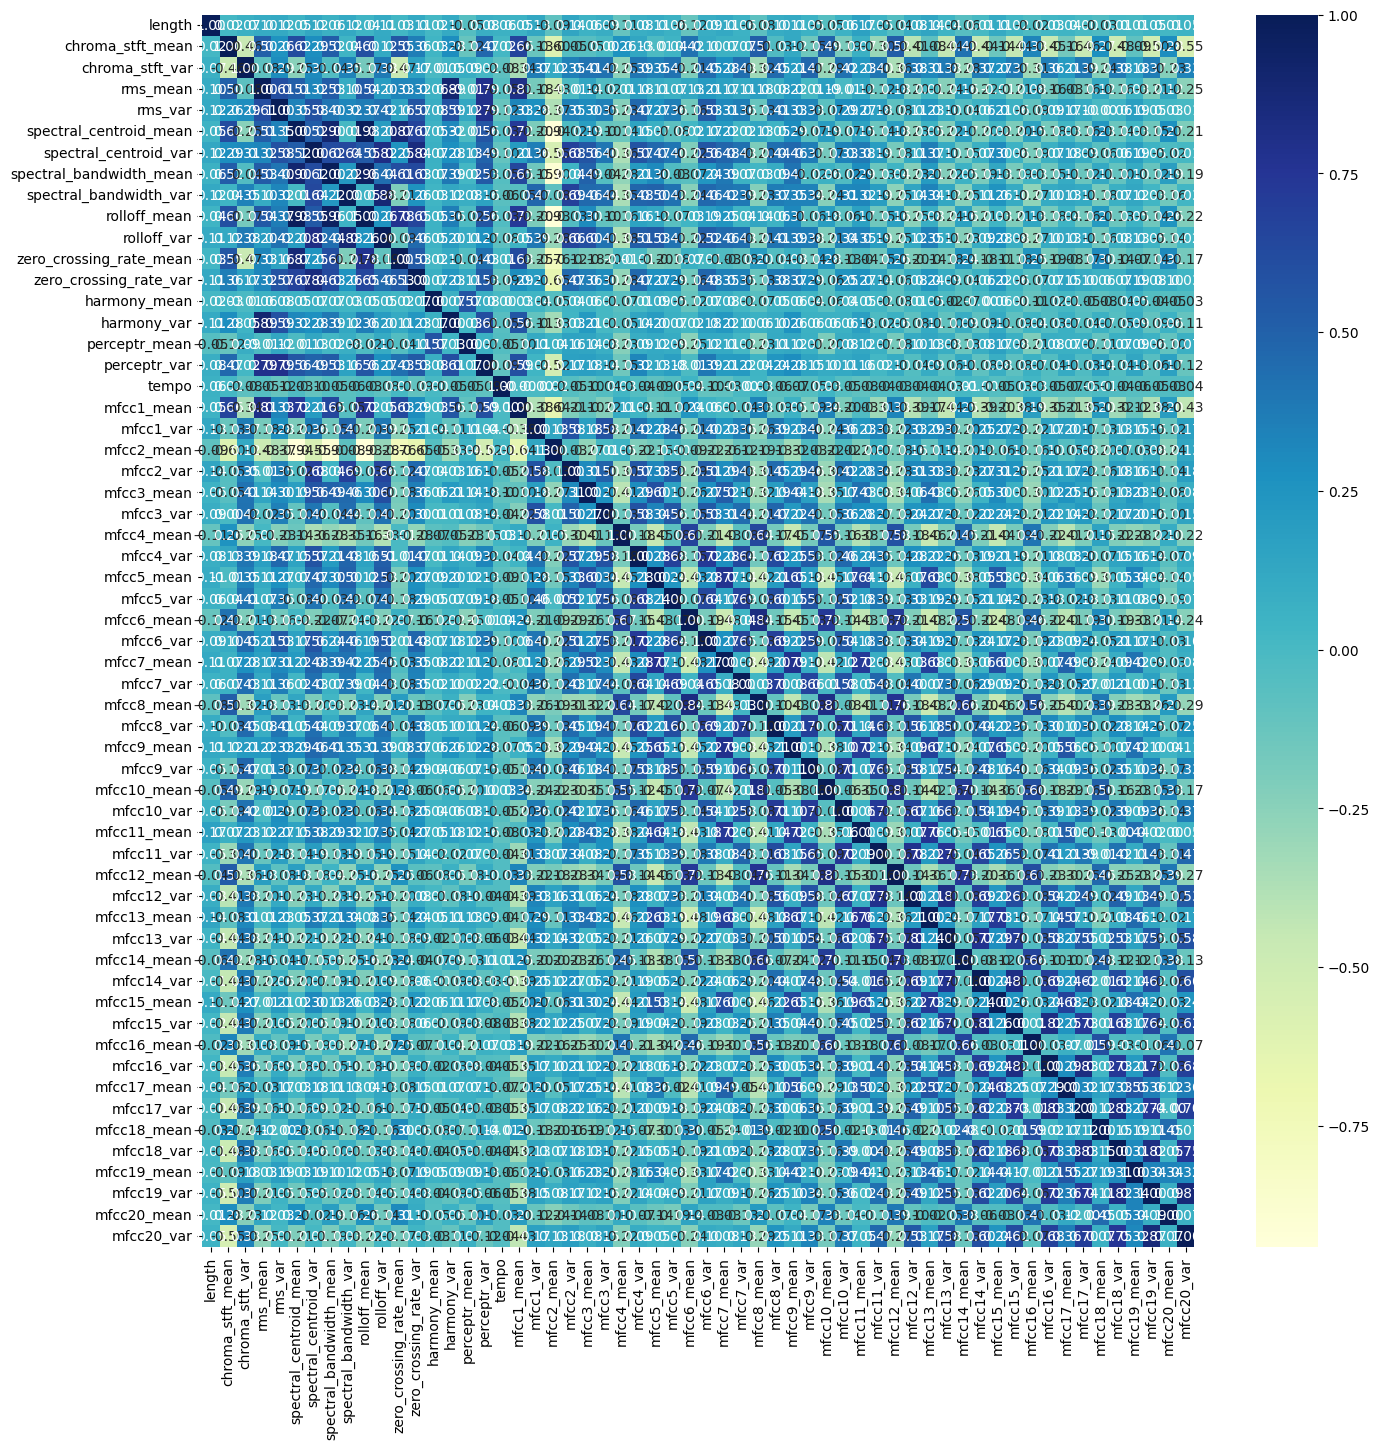

In [18]:
fig, ax = plt.subplots(figsize=(16,16))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="YlGnBu", ax=ax)

## PCA

In [19]:
labels = df["label"].to_numpy()
A = df.drop(["filename", "label"], axis=1).to_numpy()
AT_mean = np.mean(A.T, axis=1)  
X = A.T - AT_mean[:, np.newaxis]

In [20]:
U, s, VT = np.linalg.svd(X, full_matrices=False)
Phi = U.T @ X

In [21]:
colors = {'blues':'tab:blue', 'classical':'tab:orange', 'country':'tab:green', 'disco':'tab:red', 'hiphop':'tab:purple', 'jazz':'tab:brown',
          'metal':'tab:pink', 'pop':'tab:grey', 'reggae':'tab:olive', 'rock':'tab:cyan'}

2D plot:

Text(0, 0.5, '2nd\xa0principal\xa0component')

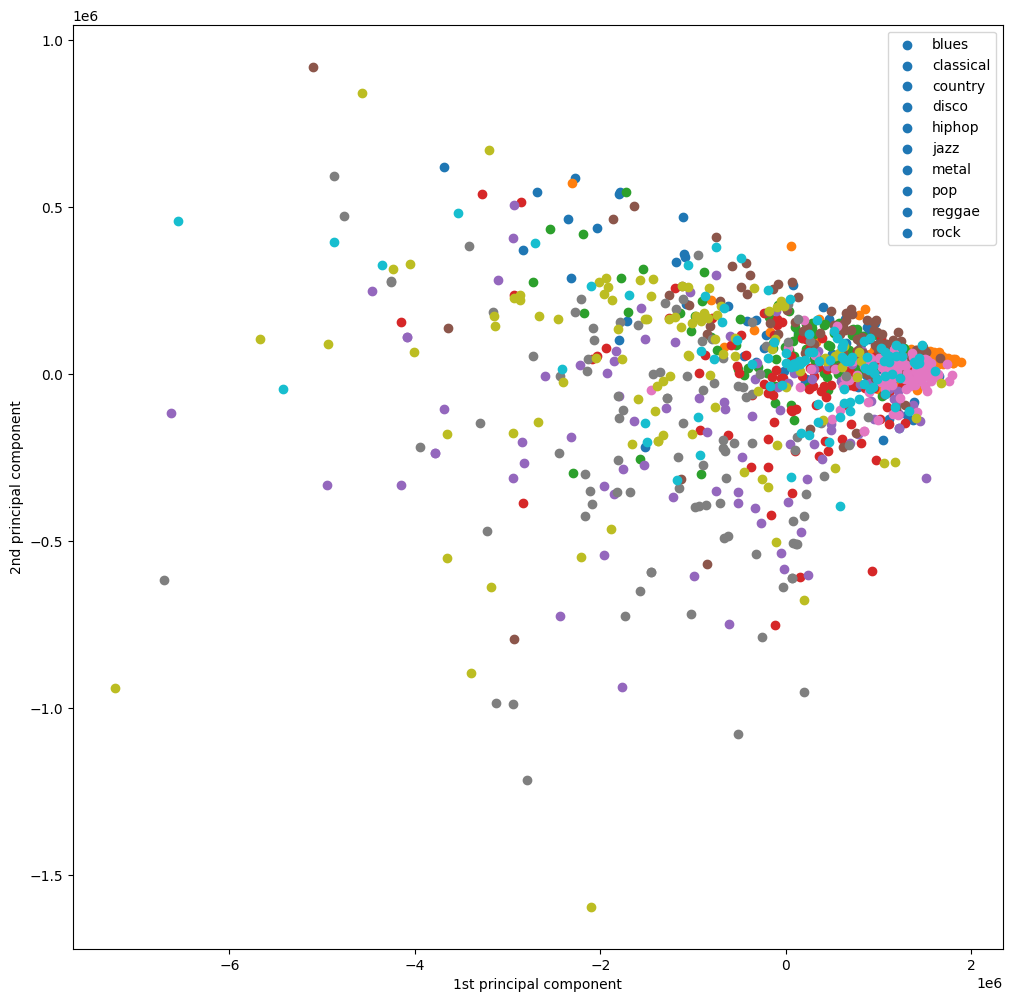

In [22]:
plt.figure(figsize=(12,12))
for i in range(len(labels)):
    plt.scatter(Phi[0,i], Phi[1,i], color=colors[labels[i]])
    
plt.legend(colors)
plt.xlabel('1st principal component')
plt.ylabel('2nd principal component')

3D plot:

In [23]:
%matplotlib widget

Text(0.5, 0, '3rd\xa0principal\xa0component')

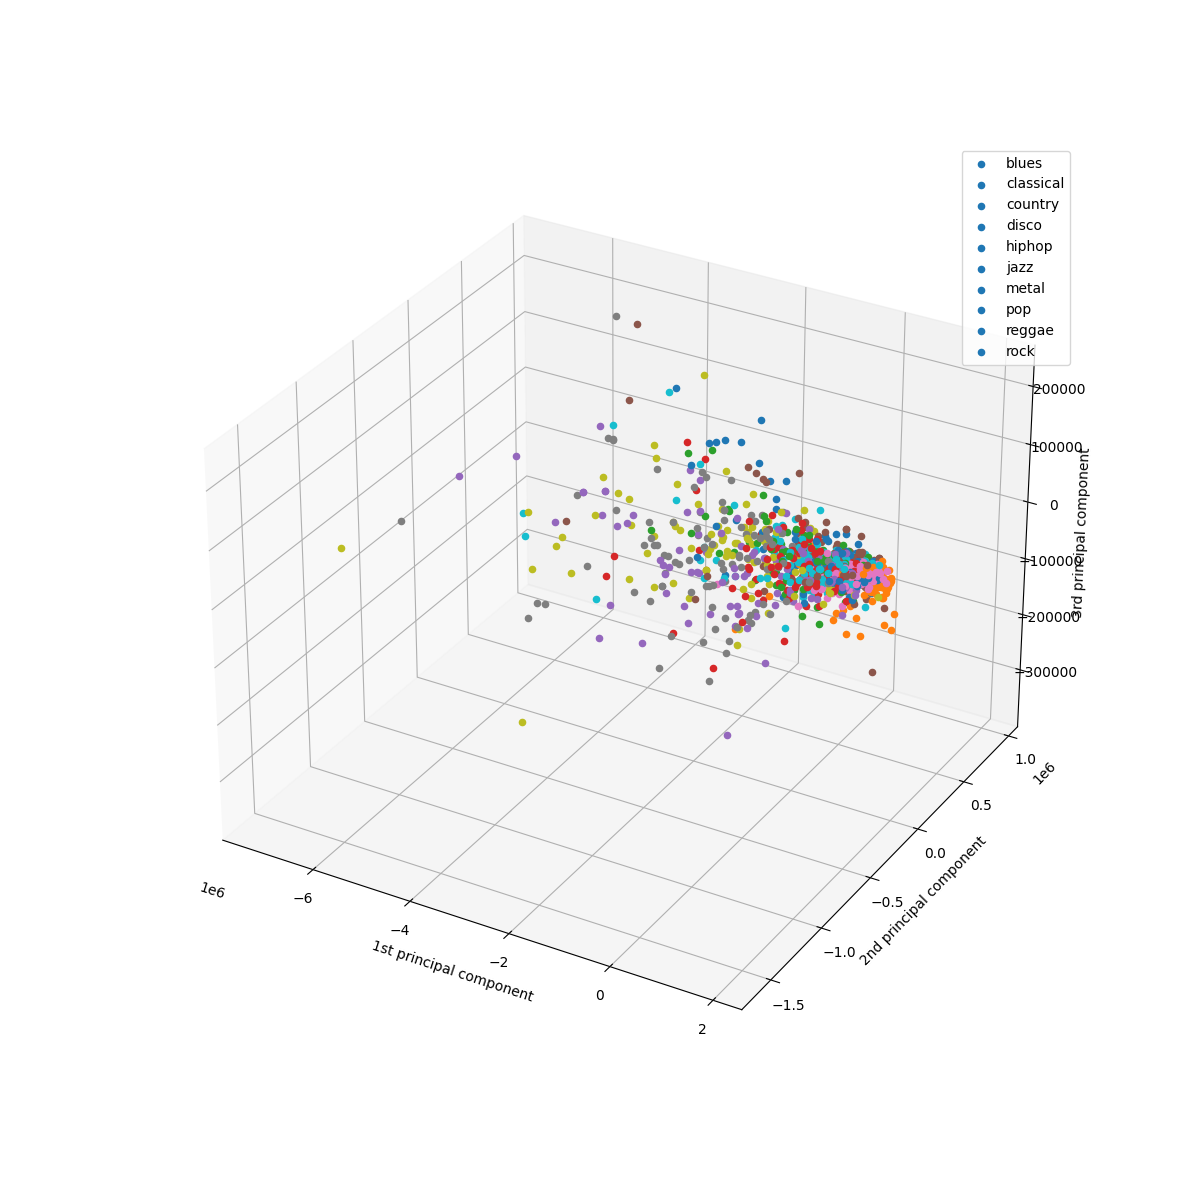

In [24]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection='3d')
for i in range(len(labels)):
    ax.scatter(Phi[0,i], Phi[1,i], Phi[2,i], color=colors[labels[i]])
    
ax.legend(colors)
ax.set_xlabel('1st principal component')
ax.set_ylabel('2nd principal component')
ax.set_zlabel('3rd principal component')